In [0]:
#Final decision_tree Implementation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
X_6 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d6.csv")
y_3 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d3.csv")
X_7 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d7.csv")
y_4 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d4.csv")
X_5 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d5.csv")
y_2 = pd.read_csv("/content/gdrive/My Drive/cloud_data/data/d2.csv")

In [0]:
cleanup_nums = {"Class_Name":{"'High'": 4, "'Medium'": 3,"'Low'": 2,"'Very Low'": 1}}
X_6.replace(cleanup_nums,inplace=True)
y_3.replace(cleanup_nums,inplace=True)

cleanup_nums = {"Class_Name":{"'High'": 4, "'Very High'": 3,"'Low'": 2,"'Very Low'": 1}}
X_7.replace(cleanup_nums,inplace=True)
y_4.replace(cleanup_nums,inplace=True)

cleanup_nums = {"Class_Name":{"'High'": 4, "'Medium'": 3,"'Low'": 2,"'Very Low'": 1}}
X_5.replace(cleanup_nums,inplace=True)
y_2.replace(cleanup_nums,inplace=True)


In [0]:
used_features =[
    
    "Jobs_per_ 5 Minutes",
    "Jobs_per_ 15Minutes",
    "Jobs_per_ 1Minute",
    "Mem capacity",
    "Disk_capacity_GB",
    "Num_of_CPU_Cores",
    "CPU_speed_per_Core",
    "Avg_Recieve_Kbps",
    "Avg_Transmit_Kbps"
]

0.9812244897959184
0.9616326530612245
0.9604081632653061


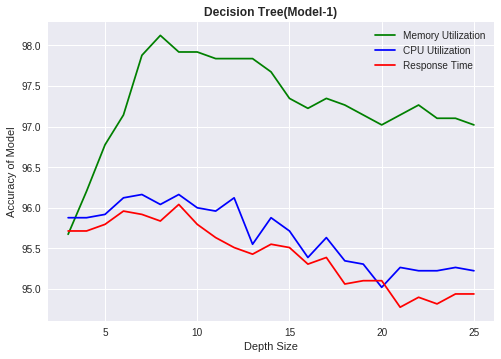

In [13]:
from sklearn.tree import DecisionTreeClassifier 
import math
import numpy as np
knn_memory = list()
knn_cpu = list()
knn_response = list()
for i in range(3,26):
    knn_memory.append(DecisionTreeClassifier(max_depth = i).fit( X_6[used_features], X_6["Class_Name"])) 
    knn_cpu.append(DecisionTreeClassifier(max_depth = i).fit( X_5[used_features], X_5["Class_Name"])) 
    knn_response.append(DecisionTreeClassifier(max_depth = i).fit( X_7[used_features], X_7["Class_Name"])) 

# accuracy on X_test 
accuracy_memory=list()
accuracy_cpu=list()
accuracy_response=list()
for i in range(23):
  accuracy_memory.append(knn_memory[i].score(y_3[used_features], y_3["Class_Name"]))
  accuracy_cpu.append(knn_cpu[i].score(y_2[used_features], y_2["Class_Name"]))
  accuracy_response.append(knn_response[i].score(y_4[used_features], y_4["Class_Name"]))
print(max(accuracy_memory))
print(max(accuracy_cpu))
print(max(accuracy_response))

accuracy_memory= np.array(accuracy_memory)
accuracy_memory= accuracy_memory*100
accuracy_cpu = np.array(accuracy_cpu)
accuracy_cpu = accuracy_cpu*100
accuracy_response = np.array(accuracy_response)
accuracy_response = accuracy_response*100


plt.plot(np.arange(3,26),accuracy_memory,'g-')
plt.plot(np.arange(3,26),accuracy_cpu,'b-')
plt.plot(np.arange(3,26),accuracy_response,'r-')
plt.legend(["Memory Utilization","CPU Utilization","Response Time"])
#plt.plot(15,accuracy_memory[13],'go',5,accuracy_cpu[3],'bo',5,accuracy_response[3],'ro')
plt.ylabel("Accuracy of Model")
plt.xlabel("Depth Size")
plt.title("Decision Tree(Model-1)",fontsize=12, fontweight='bold')
plt.show()